In [1]:
# ==============================
# 02_analysis - Fintech Analysis
# ==============================

import pandas as pd
import os

# --- 1. Mount Drive ---
from google.colab import drive
drive.mount('/content/my_drive', force_remount=True)

# --- 2. Path dasar ---
BASE = "/content/my_drive/MyDrive/fintech_project"
RAW = os.path.join(BASE, "raw")
PROC = os.path.join(BASE, "processed")

# --- 3. Helper load function ---
def load_dataset(name, format="parquet"):
    """Load dataset dari processed (parquet) atau raw (csv)."""
    if format == "parquet":
        path = os.path.join(PROC, f"{name}.parquet")
        df = pd.read_parquet(path)
    else:
        path = os.path.join(RAW, f"{name}.csv")
        df = pd.read_csv(path)
    print(f"✅ Loaded {name:20s} | Rows: {len(df):,} | Cols: {len(df.columns)}")
    return df

# --- 4. List semua tabel ---
TABLES = [
   "users",
   "merchants",
   "transactions",
   "loans",
   "repayments",
   "general_ledger",
   "opex",
   "funding_sources",
   "credit_scores",
   "customer_engagement",
   "campaign_performance",
   "support_tickets",
   "referrals",
   "settlements",
   "audit_logs",
   "fraud_alerts",
   "collection_attempts",
   "delinquency_tracking",
   "provisioning",
   "products",
   "product_pricing",
   "marketing_campaigns",
   "investor_returns"
]

# --- 5. Load semua dataset ke dictionary ---
datasets = {}
for t in TABLES:
    datasets[t] = load_dataset(t)

print("\n🎉 Semua dataset berhasil dimuat ke dictionary `datasets`")

Mounted at /content/my_drive
✅ Loaded users                | Rows: 100,000 | Cols: 7
✅ Loaded merchants            | Rows: 5,000 | Cols: 3
✅ Loaded transactions         | Rows: 500,000 | Cols: 6
✅ Loaded loans                | Rows: 80,000 | Cols: 7
✅ Loaded repayments           | Rows: 160,000 | Cols: 5
✅ Loaded general_ledger       | Rows: 50,000 | Cols: 7
✅ Loaded opex                 | Rows: 20,000 | Cols: 5
✅ Loaded funding_sources      | Rows: 5,000 | Cols: 7
✅ Loaded credit_scores        | Rows: 100,000 | Cols: 5
✅ Loaded customer_engagement  | Rows: 100,000 | Cols: 5
✅ Loaded campaign_performance | Rows: 2,000 | Cols: 7
✅ Loaded support_tickets      | Rows: 50,000 | Cols: 5
✅ Loaded referrals            | Rows: 10,000 | Cols: 5
✅ Loaded settlements          | Rows: 30,000 | Cols: 5
✅ Loaded audit_logs           | Rows: 80,000 | Cols: 5
✅ Loaded fraud_alerts         | Rows: 5,000 | Cols: 6
✅ Loaded collection_attempts  | Rows: 20,000 | Cols: 5
✅ Loaded delinquency_tracking | Row

In [5]:
import pandas as pd

# Buat list untuk simpan ringkasan
summary = []

for name, df in datasets.items():
    missing_pct = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

    summary.append({
        "Dataset": name,
        "Rows": df.shape[0],
        "Cols": df.shape[1],
        "Columns": ", ".join(df.columns.tolist()[:8]) + (" ..." if len(df.columns) > 8 else ""),
        "Missing Values (%)": round(missing_pct, 2)
    })

# Jadikan DataFrame ringkasan
summary_df = pd.DataFrame(summary)

# Tampilkan tabel ringkasan
display(summary_df)   # untuk Jupyter/Colab
# print(summary_df)   # untuk terminal biasa


,Dataset,Rows,Cols,Columns,Missing Values (%)
0,users,100000,7,"user_id, name, email, phone, signup_date, coun...",0.00
1,merchants,5000,3,"merchant_id, merchant_name, category",0.00
2,transactions,500000,6,"transaction_id, user_id, merchant_id, amount, ...",0.00
3,loans,80000,7,"loan_id, user_id, principal, interest_rate, is...",0.00
4,repayments,160000,5,"repayment_id, loan_id, payment_date, amount_pa...",0.00
5,general_ledger,50000,7,"gl_id, account_code, account_name, debit, cred...",0.00
6,opex,20000,5,"expense_id, dept, category, amount, expense_date",0.00
7,funding_sources,5000,7,"funding_id, source_type, provider, amount, int...",0.00
8,credit_scores,100000,5,"user_id, credit_score, income, dti_ratio, risk...",0.00
9,customer_engagement,100000,5,"user_id, last_login, sessions, avg_session_tim...",0.00


In [6]:
for name, df in datasets.items():
    print("="*60)
    print(f"📌 Dataset: {name}")
    print(f"Shape    : {df.shape[0]:,} rows x {df.shape[1]} cols")
    print("Columns  :", df.columns.tolist())
    print("\nPreview:")
    print(df.head(5))
    print("\n")


📌 Dataset: users
Shape    : 100,000 rows x 7 cols
Columns  : ['user_id', 'name', 'email', 'phone', 'signup_date', 'country', 'balance']

Preview:
   user_id               name                      email               phone  \
0        1  Kimberly Phillips   josephpierce@example.org   257-382-8855x5985   
1        2     Nicole Garrett     kevinweber@example.com  (680)419-2304x6296   
2        3       Kerry Nelson  christopher63@example.com    645-660-2897x991   
3        4     Kimberly Olson         cblack@example.net       (579)479-2725   
4        5      Michael Smith    oneilljason@example.org  661-940-5942x22606   

  signup_date                           country  balance  
0  2022-10-26                             Haiti  6812800  
1  2023-02-17                             Nepal  6055480  
2  2025-01-14                            Canada  2746113  
3  2024-02-13                           Denmark  1497491  
4  2023-04-08  Saint Vincent and the Grenadines  3816224  


📌 Dataset: mercha

In [7]:
datasets["opex"].head()

,expense_id,dept,category,amount,expense_date
0,1,Ops,Utilities,12029820,2023-12-14
1,2,Finance,Salary,85188933,2024-07-15
2,3,HR,Utilities,61816914,2025-05-15
3,4,Ops,Rent,65151924,2025-02-10
4,5,HR,Marketing,34445292,2024-12-29


# **1. Revenue Trend**

In [8]:
import pandas as pd

transactions = datasets["transactions"]

# Hitung revenue = amount * 1.5% untuk transaksi sukses
transactions['revenue'] = transactions.apply(
    lambda x: x['amount']*0.015 if x['status']=='Success' else 0, axis=1
)

# Pastikan kolom date jadi datetime
transactions['date'] = pd.to_datetime(transactions['date'])

# Group by per bulan
revenue_trend = (
    transactions
    .groupby(transactions['date'].dt.to_period("M"))['revenue']
    .sum()
    .reset_index()
)

# Ubah nama kolom
revenue_trend.columns = ['year_month', 'total_revenue']

# Format total_revenue ke dalam Rupiah
revenue_trend['total_revenue'] = revenue_trend['total_revenue'].apply(
    lambda x: "Rp {:,.0f}".format(x).replace(",", ".")
)

print(revenue_trend)




   year_month   total_revenue
0     2023-09  Rp 141.776.137
1     2023-10  Rp 270.025.197
2     2023-11  Rp 249.877.494
3     2023-12  Rp 267.741.692
4     2024-01  Rp 263.220.893
5     2024-02  Rp 250.304.727
6     2024-03  Rp 264.320.310
7     2024-04  Rp 257.840.950
8     2024-05  Rp 263.736.308
9     2024-06  Rp 254.413.561
10    2024-07  Rp 269.415.730
11    2024-08  Rp 267.695.798
12    2024-09  Rp 252.380.104
13    2024-10  Rp 264.048.262
14    2024-11  Rp 257.499.431
15    2024-12  Rp 258.932.585
16    2025-01  Rp 257.109.179
17    2025-02  Rp 238.440.086
18    2025-03  Rp 261.699.603
19    2025-04  Rp 257.906.208
20    2025-05  Rp 271.479.130
21    2025-06  Rp 257.521.280
22    2025-07  Rp 273.020.470
23    2025-08  Rp 263.863.893
24    2025-09  Rp 118.004.100


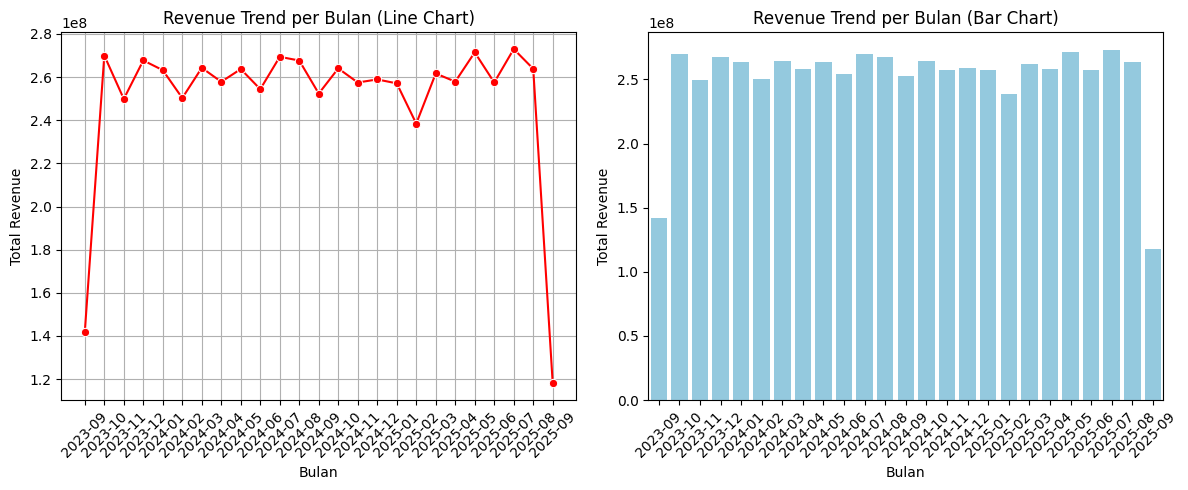

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom date sudah datetime
transactions['date'] = pd.to_datetime(transactions['date'])

# Hitung revenue = amount * 1.5% untuk transaksi sukses
transactions['revenue'] = transactions.apply(
    lambda x: x['amount']*0.015 if x['status']=='Success' else 0, axis=1
)

# Buat kolom year-month
transactions['year_month'] = transactions['date'].dt.to_period("M").astype(str)

# Aggregate revenue per bulan
revenue_trend = transactions.groupby('year_month')['revenue'].sum().reset_index()

# --- PLOT ---
plt.figure(figsize=(12,5))

# Line Chart
plt.subplot(1,2,1)
sns.lineplot(data=revenue_trend, x='year_month', y='revenue', marker='o', color='red')
plt.title("Revenue Trend per Bulan (Line Chart)")
plt.xlabel("Bulan")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)

# Bar Chart
plt.subplot(1,2,2)
sns.barplot(data=revenue_trend, x='year_month', y='revenue', color='skyblue')
plt.title("Revenue Trend per Bulan (Bar Chart)")
plt.xlabel("Bulan")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**📊 1. Revenue**

Definisi: total pendapatan dari transaksi sukses.

Formula:Revenue=∑(amount×1.5%)hanya untuk transaksi sukses

**📊 2. Frequency**

Definisi: seberapa sering user melakukan transaksi.

Bisa dihitung rata-rata jumlah transaksi per user.

Formula:Conversion Rate=Total TransactionsSuccess Transactions​×100%

**📊 4. Avg Txn (Average Transaction Value)**

Definisi: rata-rata nilai transaksi sukses.

Formula:Avg Txn=Number of Success TransactionsTotal Amount (Success)​

**📊 5. Seasonal Trend**

Definisi: pola revenue / transaksi per bulan (atau per minggu).

Bisa divisualisasikan untuk melihat trend musiman.

📊 Fintech Metrics
Total Revenue         : Rp 6,252,273,127
Avg Frequency/User    : 5.04 transaksi/user
Conversion Rate       : 33.26%
Avg Transaction Value : Rp 2,506,227


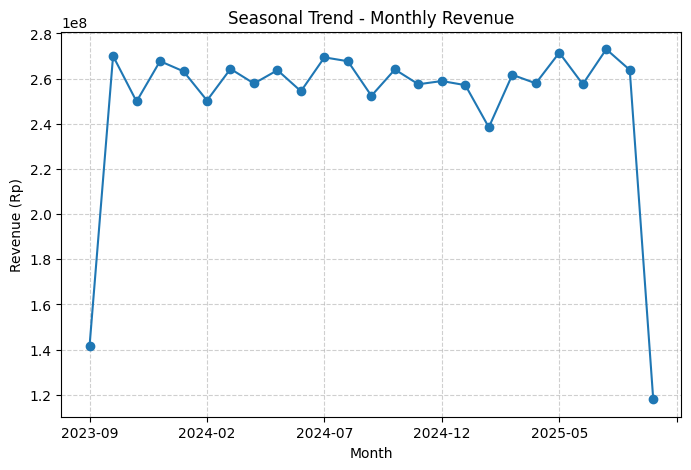

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil dataset transaksi
transactions = datasets["transactions"].copy()

# Hitung revenue per transaksi (1.5% dari amount jika Success)
transactions["revenue"] = transactions.apply(
    lambda x: x["amount"] * 0.015 if x["status"] == "Success" else 0, axis=1
)

# Pastikan kolom date ke datetime
transactions["date"] = pd.to_datetime(transactions["date"])

# ========== 1. Revenue ==========
total_revenue = transactions["revenue"].sum()

# ========== 2. Frequency ==========
frequency = transactions.groupby("user_id")["transaction_id"].count().mean()

# ========== 3. Conversion Rate ==========
conversion_rate = (transactions[transactions["status"]=="Success"].shape[0] /
                   transactions.shape[0]) * 100

# ========== 4. Avg Transaction Value ==========
avg_txn = transactions.loc[transactions["status"]=="Success", "amount"].mean()

# ========== 5. Seasonal Trend (Revenue per Month) ==========
monthly_revenue = transactions.groupby(transactions["date"].dt.to_period("M"))["revenue"].sum()
monthly_revenue.index = monthly_revenue.index.astype(str)

# Tampilkan hasil
print("📊 Fintech Metrics")
print(f"Total Revenue         : Rp {total_revenue:,.0f}")
print(f"Avg Frequency/User    : {frequency:.2f} transaksi/user")
print(f"Conversion Rate       : {conversion_rate:.2f}%")
print(f"Avg Transaction Value : Rp {avg_txn:,.0f}")

# Plot seasonal trend
plt.figure(figsize=(8,5))
monthly_revenue.plot(marker="o")
plt.title("Seasonal Trend - Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue (Rp)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**🎯 Interpretasi bisnis**

**Avg Frequency/User    : 5.04 transaksi/user** → User aktif rata-rata melakukan 5 transaksi.

- Semakin besar angkanya → user lebih sering bertransaksi → loyalitas/engagement lebih tinggi.

- Kalau angka rendah → mungkin user banyak yang hanya transaksi sekali, lalu tidak kembali.

**Conversion Rate       : 33.26%**
rasio transaksi sukses terhadap total transaksi.
33.26% artinya:
Dari setiap 100 transaksi yang dicoba user, hanya 33 transaksi yang benar-benar berhasil.

Angka ini bisa dianggap cukup rendah untuk platform fintech, karena idealnya conversion rate transaksi (pembayaran, top-up, dll) biasanya >80%.

Conversion Rate rendah bisa berarti:

1. Banyak transaksi gagal karena insufficient balance.

2. Ada masalah di payment gateway (timeout, error).

3. User hanya coba-coba tanpa menyelesaikan transaksi.

**📌 Insight**

- Conversion Rate adalah indikator kesehatan operasional.

- Kalau <50%, biasanya ada bottleneck di proses transaksi yang harus diteliti.

- Kalau naik mendekati 90–95%, berarti sistem makin stabil dan user makin “niat” untuk transaksi.

# Trend Conversion Rate per bulan

/tmp/ipython-input-1984785332.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x[x["status"]=="Success"].shape[0] / x.shape[0]) * 100)


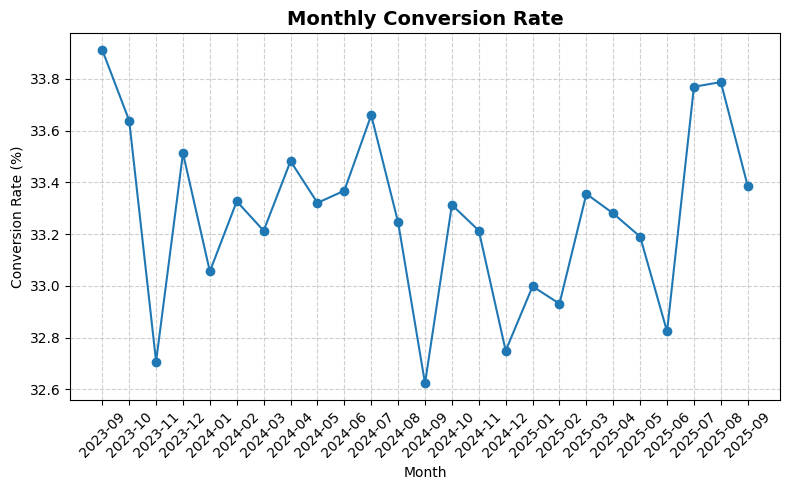

      month  conversion_rate
0   2023-09        33.911024
1   2023-10        33.638379
2   2023-11        32.707709
3   2023-12        33.512722
4   2024-01        33.055936
5   2024-02        33.326657
6   2024-03        33.213065
7   2024-04        33.481991
8   2024-05        33.320730
9   2024-06        33.367794
10  2024-07        33.659400
11  2024-08        33.245544
12  2024-09        32.623526
13  2024-10        33.312909
14  2024-11        33.213697
15  2024-12        32.749679
16  2025-01        32.998159
17  2025-02        32.931330
18  2025-03        33.355413
19  2025-04        33.279766
20  2025-05        33.190018
21  2025-06        32.824092
22  2025-07        33.769043
23  2025-08        33.787087
24  2025-09        33.385564


In [11]:
import matplotlib.pyplot as plt

# Pastikan kolom date sudah datetime
transactions["date"] = pd.to_datetime(transactions["date"])

# Tambah kolom month
transactions["month"] = transactions["date"].dt.to_period("M")

# Hitung conversion rate per bulan
monthly_cr = (
    transactions.groupby("month")
    .apply(lambda x: (x[x["status"]=="Success"].shape[0] / x.shape[0]) * 100)
    .reset_index(name="conversion_rate")
)

# Plot trend
plt.figure(figsize=(8,5))
plt.plot(monthly_cr["month"].astype(str), monthly_cr["conversion_rate"], marker="o")
plt.title("Monthly Conversion Rate", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

print(monthly_cr)


**ARPU (Average Revenue Per User)**

Untuk menghitung **ARPU (Average Revenue Per User)**, rumus dasarnya adalah:

 **ARPU** =
Total Revenue /
Jumlah User Unik
	​

**ARPU per minggu**

Total Revenue: Rp 6.252.273.127
Unique Users: 99287
ARPU: Rp 62.972


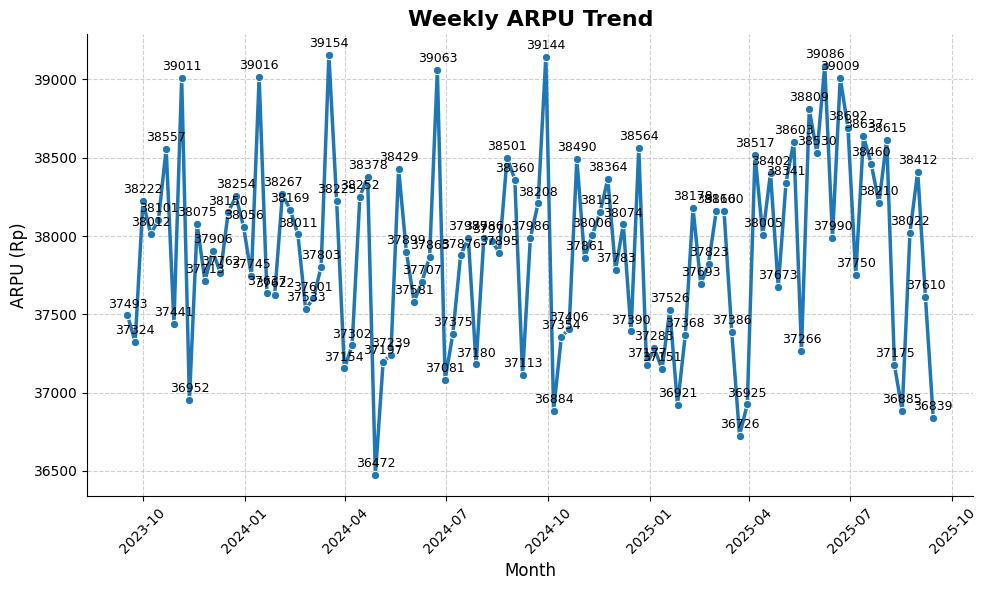

In [28]:
# Hitung revenue per transaksi (misal revenue = 1.5% dari amount hanya untuk transaksi sukses)
transactions = datasets["transactions"]
transactions["revenue"] = transactions.apply(
    lambda x: x["amount"] * 0.015 if x["status"] == "Success" else 0, axis=1
)

# Total revenue
total_revenue = transactions["revenue"].sum()

# Jumlah user unik
unique_users = transactions["user_id"].nunique()

# ARPU
arpu = total_revenue / unique_users

print("Total Revenue:", f"Rp {total_revenue:,.0f}".replace(",", "."))
print("Unique Users:", unique_users)
print("ARPU:", f"Rp {arpu:,.0f}".replace(",", "."))
# Hitung revenue (misal 1.5% dari amount jika transaksi sukses)
transactions = datasets["transactions"]
transactions["revenue"] = transactions.apply(
    lambda x: x["amount"] * 0.015 if x["status"] == "Success" else 0, axis=1
)

# Hitung ARPU per minggu
arpu_weekly = (
    transactions[transactions["status"]=="Success"]
    .groupby(pd.Grouper(key="date", freq="W"))
   .agg(revenue_sum=("revenue", "sum"), users=("user_id", "nunique"))
    .assign(ARPU=lambda d: d["revenue_sum"] / d["users"])
    .reset_index()[["date", "ARPU"]]
)

# Plot dengan seaborn
plt.figure(figsize=(10,6))
sns.lineplot(data=arpu_weekly, x="date", y="ARPU", marker="o", linewidth=2.5)

# Styling
plt.title("Weekly ARPU Trend", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("ARPU (Rp)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
sns.despine()

# Tambahkan label di tiap titik
for i, row in arpu_weekly.iterrows():
    plt.text(row["date"], row["ARPU"]+50, f"{row['ARPU']:.0f}",
             ha="center", fontsize=9, color="black")

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Parameter CLV
avg_lifespan, gross_margin = 12, 0.6

# Dictionary untuk akumulasi revenue per user
user_revenue_dict = {}

# Baca file besar per 1 juta baris
chunksize = 1_000_000
for chunk in pd.read_csv("/content/my_drive/MyDrive/fintech_project/raw/transactions.csv", chunksize=chunksize):
    # Filter hanya transaksi sukses
    chunk = chunk.query("status == 'Success'")

    # Hitung revenue per user di chunk ini
    revenue_per_user = chunk.groupby("user_id")["amount"].sum() * 0.015

    # Gabungkan dengan hasil sebelumnya
    for user_id, revenue in revenue_per_user.items():
        user_revenue_dict[user_id] = user_revenue_dict.get(user_id, 0) + revenue

# Ubah dict ke DataFrame
user_revenue = pd.DataFrame(list(user_revenue_dict.items()), columns=["user_id", "revenue"])
user_revenue["CLV_user"] = user_revenue["revenue"] * avg_lifespan * gross_margin

# Ambil top 10 user
top10_users = user_revenue.nlargest(10, "CLV_user")
print(top10_users)


       user_id     revenue     CLV_user
69905    86101  455016.060  3276115.632
58343    71837  438172.470  3154841.784
26263    32334  408652.530  2942298.216
29235    35963  406822.305  2929120.596
70244    86507  390841.755  2814060.636
41694    51385  390475.935  2811426.732
2056      2541  389996.625  2807975.700
11770    14471  380382.585  2738754.612
716        891  379766.895  2734321.644
61509    75763  377534.610  2718249.192


/tmp/ipython-input-1874837546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


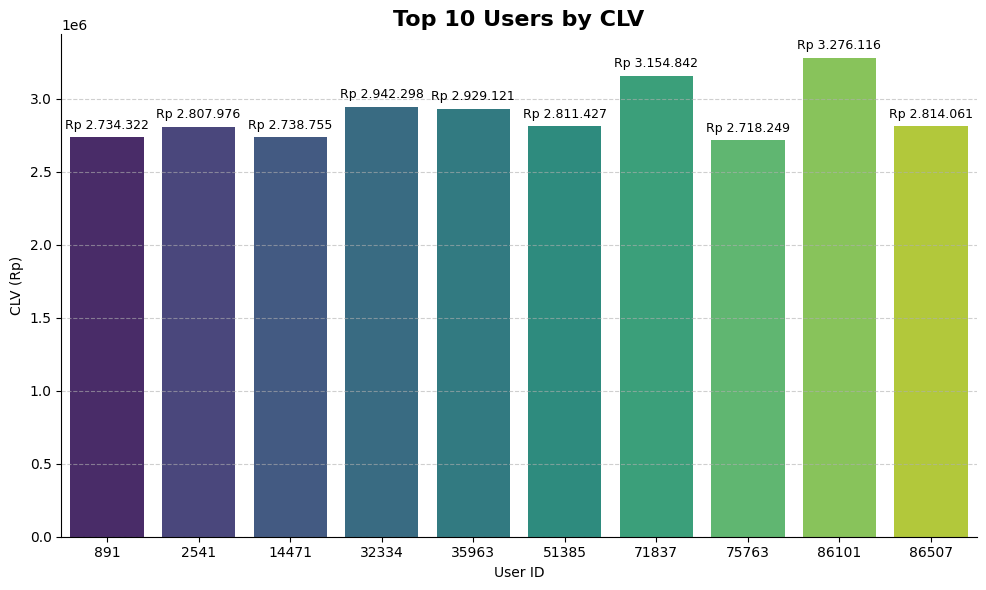

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Pake palette manual biar ga pakai hue
colors = sns.color_palette("viridis", len(top10_users))

ax = sns.barplot(
    data=top10_users,
    x="user_id", y="CLV_user",
    palette=colors, estimator=sum
)

plt.title("Top 10 Users by CLV", fontsize=16, weight="bold")
plt.xlabel("User ID"); plt.ylabel("CLV (Rp)")
plt.grid(axis="y", linestyle="--", alpha=0.6); sns.despine()

# Tambah label tepat di atas bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,  # posisi tengah bar
        p.get_height() + (0.02 * p.get_height()),  # sedikit di atas bar
        f"Rp {p.get_height():,.0f}".replace(",", "."),
        ha="center", fontsize=9
    )

plt.tight_layout(); plt.show()


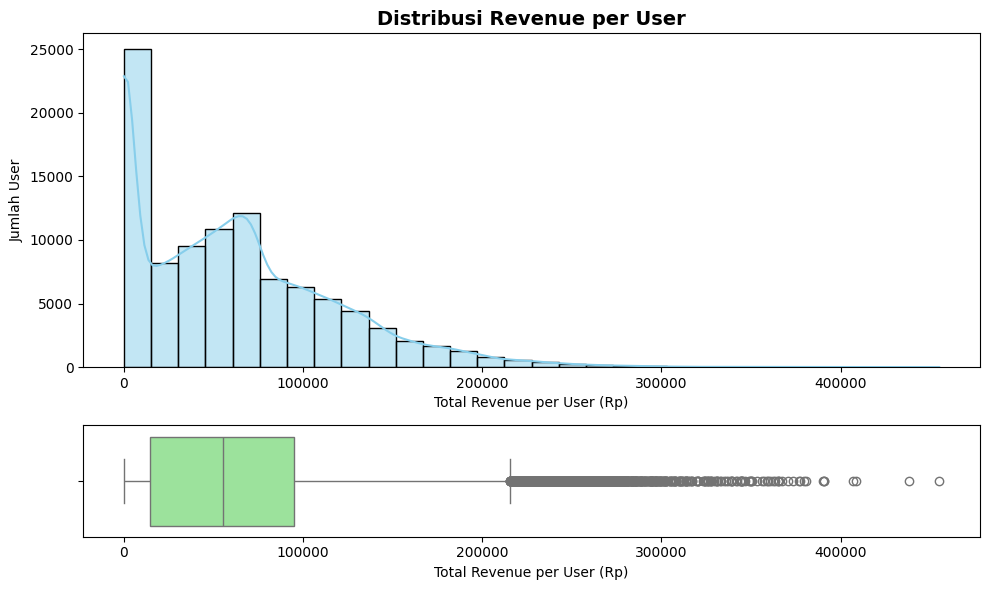

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

transactions = datasets["transactions"]
transactions["revenue"] = transactions.apply(
    lambda x: x["amount"] * 0.015 if x["status"] == "Success" else 0, axis=1
)
# Agregasi revenue per user
user_revenue = transactions.groupby("user_id")["revenue"].sum().reset_index()

# Buat figure dengan 2 subplot (histogram + boxplot)
fig, axes = plt.subplots(2, 1, figsize=(10,6), gridspec_kw={"height_ratios": [3,1]})

# Histogram + KDE
sns.histplot(user_revenue["revenue"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribusi Revenue per User", fontsize=14, weight="bold")
axes[0].set_xlabel("Total Revenue per User (Rp)")
axes[0].set_ylabel("Jumlah User")

# Boxplot
sns.boxplot(x=user_revenue["revenue"], ax=axes[1], color="lightgreen")
axes[1].set_xlabel("Total Revenue per User (Rp)")

plt.tight_layout()
plt.show()


**🔎 Bagian 1: Histogram (atas)**

**1. Distribusi miring ke kanan (positively skewed)**

  - Mayoritas user berada di sisi kiri (revenue rendah, di bawah Rp 100 ribu).

  - Jumlah user menurun drastis ketika revenue makin tinggi → ada “ekor panjang” ke kanan.

**2. Puncak histogram (mode)**

  - Paling banyak user punya total revenue sangat rendah (0 – 50 ribu).

  - Ini menandakan ada banyak user yang hanya sedikit transaksi atau sekali transaksi kecil.

**3. Kurva KDE (garis biru)**

  - Menunjukkan estimasi densitas distribusi.

  - Menguatkan bahwa distribusi tidak normal, tapi long-tail (banyak outlier di kanan).

**🔎 Bagian 2: Boxplot (bawah)**

**1. Median (garis tengah kotak)**

  - Median sekitar Rp 70 ribu – Rp 80 ribu.

  - Artinya 50% user punya revenue di bawah angka itu.

**2. IQR (interquartile range, panjang kotak hijau)**

  - Dari Q1 (- Rp 30 ribu) sampai Q3 (- Rp 120 ribu).

  - Jadi 50% user “rata-rata” belanja di range Rp 30 ribu – Rp 120 ribu.

**3. Whiskers (garis horizontal)**

  - Whisker kanan berhenti sekitar Rp 200 ribu.

  - Di atas itu dianggap outlier.

**4. Outlier (titik-titik kanan)**

  - Ada banyak titik di kanan (user high spender).

  - Sebagian bahkan lebih dari Rp 400 ribu.

  - Menunjukkan adanya minoritas user yang kontribusinya jauh lebih besar dibanding user lain.

**📊 Kesimpulan Insight**

  - Mayoritas user → revenue sangat kecil (di bawah Rp 100 ribu).

  - Distribusi sangat skewed → sedikit user menyumbang revenue besar → potensi “power user”.

**Strategi bisnis:**

  - Bisa fokus retensi dan engagement untuk “power user” karena mereka kontribusi besar.

  - Untuk mayoritas user dengan revenue kecil, perlu program aktivasi/upselling biar lebih sering transaksi.

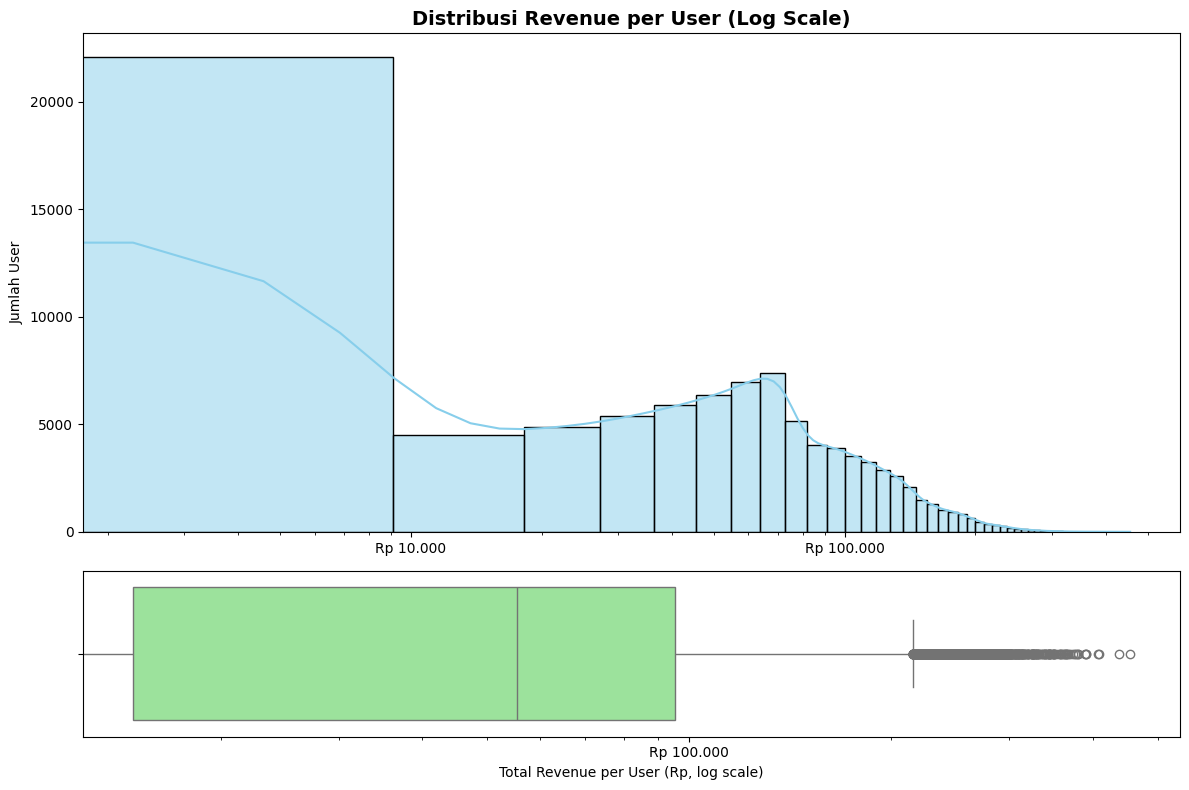

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Formatter untuk Rupiah (Rp dengan pemisah ribuan titik)
formatter = FuncFormatter(lambda x, _: f"Rp {int(x):,}".replace(",", "."))

fig, ax = plt.subplots(2, 1, figsize=(12,8), gridspec_kw={'height_ratios':[3,1]})

# --- Histogram (log scale) ---
sns.histplot(user_revenue["revenue"], bins=50, kde=True, color="skyblue", ax=ax[0])
ax[0].set_xscale("log")
ax[0].set_title("Distribusi Revenue per User (Log Scale)", fontsize=14, weight="bold")
ax[0].set_xlabel("")
ax[0].set_ylabel("Jumlah User")
ax[0].xaxis.set_major_formatter(formatter)

# --- Boxplot (log scale) ---
sns.boxplot(x=user_revenue["revenue"], color="lightgreen", ax=ax[1])
ax[1].set_xscale("log")
ax[1].set_xlabel("Total Revenue per User (Rp, log scale)")
ax[1].xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


# **2. NPL (Non-Performing Loan)**

In [13]:
loans = datasets["loans"]

npl_rate = loans[loans['status']=='Default'].shape[0] / loans.shape[0]
print("NPL Rate:", round(npl_rate*100, 2), "%")


NPL Rate: 33.46 %


**🎯 Interpretasi bisnis**

33.46% artinya: dari setiap Rp 100 pinjaman yang diberikan, Rp 33,46 sedang bermasalah/macet.

- Angka ini sangat tinggi kalau dibandingkan standar industri:


*   Bank/FinTech sehat biasanya menjaga NPL < 5%.
*   10% = risiko serius.
*   33% = menandakan kualitas kredit sangat buruk → bisa mengancam keberlangsungan bisnis.

**📌 Insight**

Tingginya NPL bisa disebabkan oleh:

1. Proses credit scoring lemah → banyak user berisiko tinggi tetap diberi pinjaman.

2. Kurang monitoring & collection → tidak ada follow-up efektif.

3. Kondisi ekonomi makro → user kehilangan pendapatan, gagal bayar.

**Solusi:**

*   Perketat credit risk model (misalnya dengan machine learning).
*   Tambahkan provisioning/cadangan agar kerugian tidak menghantam langsung profit.
*   Monitoring borrower lebih aktif.







status      Active     Closed    Default
cohort                                  
2023-09  32.614413  32.772225  34.613361
2023-10  33.744741  33.323983  32.931276
2023-11  32.868828  33.111178  34.019994
2023-12  32.226562  34.291295  33.482143
2024-01  35.267478  32.097368  32.635154


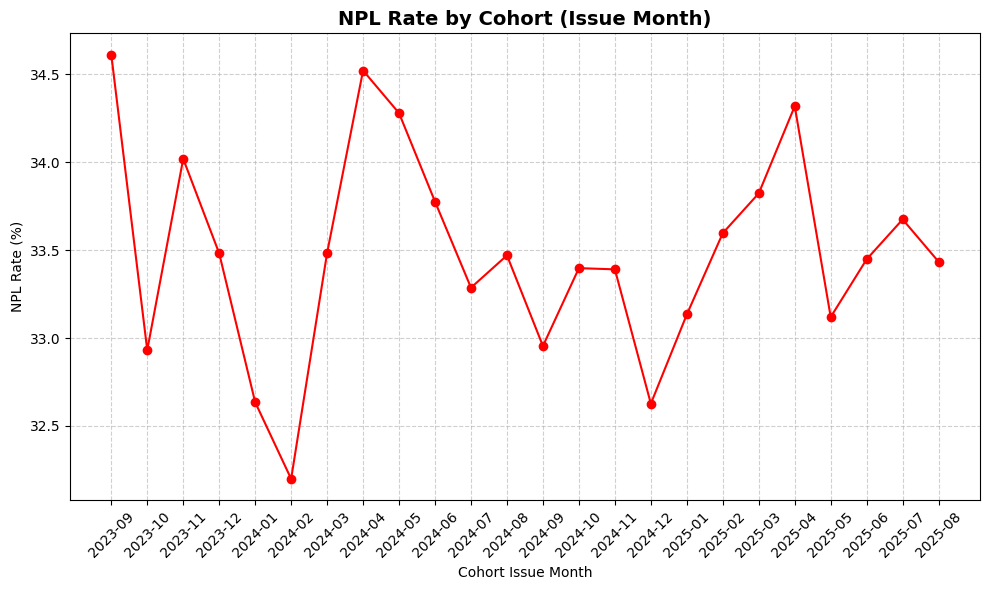

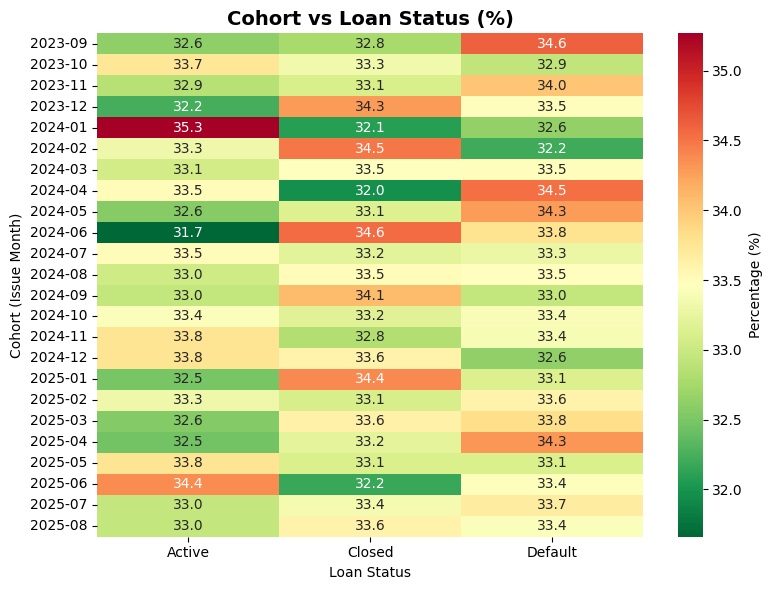

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Pastikan kolom date sudah datetime
loans = datasets["loans"]

# Pastikan issue_date datetime
loans["issue_date"] = pd.to_datetime(loans["issue_date"])
loans["cohort"] = loans["issue_date"].dt.to_period("M")

# Hitung jumlah pinjaman per cohort & status
cohort_status = loans.groupby(["cohort", "status"]).size().reset_index(name="count")

# Hitung total pinjaman per cohort
cohort_total = loans.groupby("cohort")["loan_id"].count().reset_index(name="total")

# Merge
cohort_merged = cohort_status.merge(cohort_total, on="cohort")
cohort_merged["pct"] = cohort_merged["count"] / cohort_merged["total"] * 100

# Pivot → biar gampang baca
cohort_pivot = cohort_merged.pivot(index="cohort", columns="status", values="pct").fillna(0)

print(cohort_pivot.head())

# Plot khusus kolom Default (NPL Cohort)
plt.figure(figsize=(10,6))
plt.plot(cohort_pivot.index.astype(str), cohort_pivot["Default"], marker="o", color="red")
plt.title("NPL Rate by Cohort (Issue Month)", fontsize=14, weight="bold")
plt.xlabel("Cohort Issue Month")
plt.ylabel("NPL Rate (%)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    cohort_pivot,
    annot=True, fmt=".1f", cmap="RdYlGn_r", cbar_kws={'label': 'Percentage (%)'}
)

plt.title("Cohort vs Loan Status (%)", fontsize=14, weight="bold")
plt.xlabel("Loan Status")
plt.ylabel("Cohort (Issue Month)")
plt.tight_layout()
plt.show()


**🔎 Interpretasi Bisnis**

1. Proporsi status relatif stabil

- Hampir semua cohort berada di kisaran 32–35% untuk tiap kategori (Active, Closed, Default).

- Ini menandakan distribusi status cukup seimbang & pola relatif konsisten antar bulan.

2. Default (NPL) fluktuatif tapi tidak ekstrem

- Contoh:
  - Cohort 2023-09 Default = 34.6% (cukup tinggi).

  - Cohort 2024-01 Default = 32.6% (lebih rendah).

  - Cohort 2024-04 Default = 34.5% lagi meningkat.

- Range fluktuasi kecil (±2%), artinya risiko relatif stabil tapi tetap perlu dimonitor.

3. Closed Loan kadang mendominasi

- Ada beberapa bulan dengan persentase Closed di atas 34% (contoh: 2024-02 = 34.5%, 2025-01 = 34.4%).

- Bisa berarti: pinjaman di cohort itu banyak yang cepat selesai/lunas dibanding bulan lain.

4. Active Loan paling sering di kisaran 32–34%

- Tidak ada tren jelas peningkatan atau penurunan.

- Artinya, pertumbuhan outstanding loan stabil, tidak ada cohort yang tiba-tiba macet total atau langsung lunas cepat.

**💡 Insight Bisnis**

1. Stabilitas portofolio

- Dengan distribusi yang relatif stabil, portofolio pinjaman masih dalam kondisi terkendali.

- Tidak ada cohort yang “meledak” dengan NPL >40%, sehingga risiko sistemik kecil.

2. Monitoring cohort tertentu

- Cohort dengan Default >34% (misalnya 2023-09, 2023-11, 2024-04, 2025-04) → perlu investigasi.

- Apakah ada pola borrower tertentu? (misal sektor pekerjaan, lokasi, tenor pendek vs panjang).

3. Potensi perbaikan produk / underwriting

- Kalau cohort dengan default tinggi ternyata muncul karena perubahan strategi marketing/akuisisi, berarti filtering kredit scoring perlu diperketat.

4. Positive note (Closed tinggi)

- Cohort dengan Closed >34% bisa jadi menandakan customer lebih disiplin bayar atau produk cocok dengan profil borrower.

- Bisa dijadikan benchmark → “apa yang beda dengan cohort ini?”

**🎯 Rekomendasi Aksi**

1. Segmentasi lebih lanjut per cohort → gali faktor borrower (usia, pekerjaan, tenor, sektor).

2. Bandingkan default vs ekonomi makro (misalnya inflasi, suku bunga di bulan itu).

3. Gunakan cohort “baik” (Closed tinggi, Default rendah) untuk optimasi targeting borrower ke depan.

4. Tetap monitor tren jangka panjang → meski stabil, default 33–34% masih cukup tinggi untuk industri lending (target sehat biasanya <5–10%).

   year    Default
0  2023  33.761694
1  2024  33.335397
2  2025  33.569000


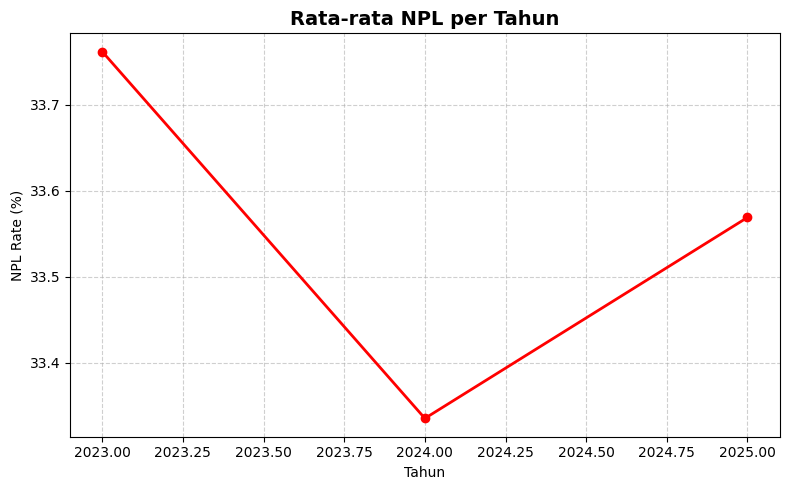

In [15]:
# Ambil hanya kolom Default dari cohort_pivot
npl = cohort_pivot["Default"].reset_index()

# Ubah cohort (period) jadi datetime, lalu ambil tahunnya
npl["year"] = npl["cohort"].dt.year
npl_yearly = npl.groupby("year")["Default"].mean().reset_index()

print(npl_yearly)

# Plot tren NPL tahunan
plt.figure(figsize=(8,5))
plt.plot(npl_yearly["year"], npl_yearly["Default"], marker="o", color="red", linewidth=2)
plt.title("Rata-rata NPL per Tahun", fontsize=14, weight="bold")
plt.xlabel("Tahun")
plt.ylabel("NPL Rate (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

**🔎 Insight Bisnis**

1. Perbaikan signifikan di 2024

- Bisa jadi efek dari pengetatan scoring atau strategi akuisisi borrower lebih selektif.

- Tahun ini menunjukkan kualitas portofolio relatif lebih sehat.

2. 2025 mulai ada sinyal kenaikan risiko

- Rata-rata NPL meningkat sedikit dari 2024.

- Perlu dicek apakah ini karena:

    - Ekonomi makro (misal suku bunga, inflasi naik).

    - Segmen borrower baru yang lebih berisiko.

    - Perubahan produk / tenor pinjaman.

3. Secara umum stabil

- Range perbedaan antar tahun hanya sekitar 0.4% → cukup stabil.

- Artinya portfolio NPL terkendali, belum ada lonjakan besar.

# **3. CLV (Customer Lifetime Value)**

In [16]:
user_revenue = transactions.groupby('user_id')['revenue'].sum()
clv = user_revenue.mean()

# Format jadi Rupiah
print("Average CLV:", f"Rp {clv:,.0f}".replace(",", "."))


Average CLV: Rp 62.972


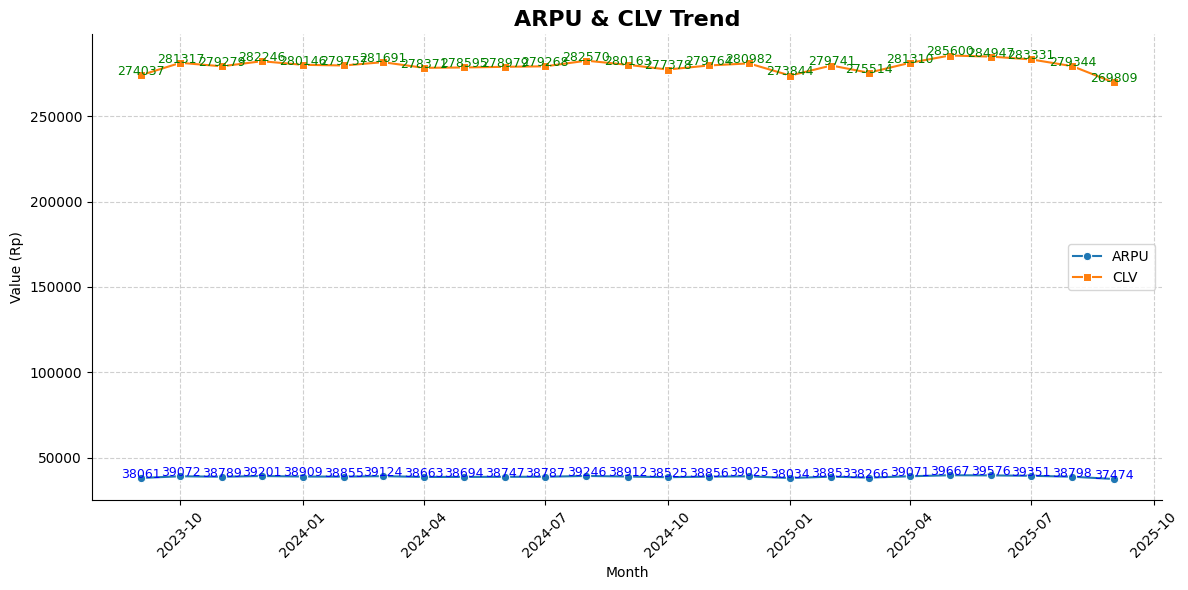

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom date & revenue
transactions["date"] = pd.to_datetime(transactions["date"])
transactions["revenue"] = transactions.apply(
    lambda x: x["amount"] * 0.015 if x["status"] == "Success" else 0, axis=1
)

# Hitung ARPU bulanan
arpu_monthly = (
    transactions.query("status == 'Success'")
    .groupby(pd.Grouper(key="date", freq="MS"))
    .agg(revenue_sum=("revenue", "sum"), users=("user_id", "nunique"))
    .assign(ARPU=lambda d: d["revenue_sum"] / d["users"])
    .reset_index()[["date", "ARPU"]]
)


# Hitung CLV
arpu_monthly["CLV"] = arpu_monthly["ARPU"] * 12 * 0.6  # lifespan=12, margin=60%

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(data=arpu_monthly, x="date", y="ARPU", marker="o", label="ARPU")
sns.lineplot(data=arpu_monthly, x="date", y="CLV", marker="s", label="CLV")

plt.title("ARPU & CLV Trend", fontsize=16, weight="bold")
plt.xlabel("Month"); plt.ylabel("Value (Rp)")
plt.grid(True, linestyle="--", alpha=0.6); plt.xticks(rotation=45)
sns.despine(); plt.legend()

# Label nilai
for _, r in arpu_monthly.iterrows():
    plt.text(r["date"], r["ARPU"]+50, f"{r['ARPU']:.0f}", ha="center", fontsize=9, color="blue")
    plt.text(r["date"], r["CLV"]+50, f"{r['CLV']:.0f}", ha="center", fontsize=9, color="green")

plt.tight_layout(); plt.show()


# **4. Churn Rate**

In [18]:
users = datasets["users"]
engagement = datasets["customer_engagement"]

# Asumsi churn = user yg signup > 90 hari tapi last_login > 60 hari lalu
import datetime

engagement['last_login'] = pd.to_datetime(engagement['last_login'])
today = engagement['last_login'].max()
churned_users = engagement[engagement['last_login'] < today - pd.Timedelta(days=60)].shape[0]
churn_rate = churned_users / engagement.shape[0]

print("Churn Rate:", round(churn_rate*100, 2), "%")


Churn Rate: 0.0 %


# **5. CAC (Customer Acquisition Cost)**

In [19]:
opex = datasets["opex"]

# Filter kategori marketing
marketing_exp = opex[opex['category']=='Marketing']['amount'].sum()

new_users = users.shape[0]  # total user
cac = marketing_exp / new_users
print("CAC:",f"Rp {cac:,.0f}".replace(",", "."))


CAC: Rp 2.546.868


**📊 Interpretasi Bisnis dengan CAC**

1. Unit Economics Negatif

- CLV (Rp 62.972) << CAC (Rp 2.546.867)

- Artinya setiap kali perusahaan mendapatkan 1 customer, biaya akuisisinya ~40x lebih mahal daripada pendapatan seumur hidup customer itu.

- Dengan model sekarang, semakin banyak customer justru makin rugi.

2. Payback Impossible

- Normalnya, CLV harus > CAC (idealnya 3x CAC).

- Dalam kasus ini, butuh customer aktif bertahan 40 kali lebih lama atau revenue per customer meningkat drastis supaya balik modal.

3. Root Cause
Gap ini bisa muncul karena:

- CAC terlalu tinggi → strategi marketing/iklan boros.

- CLV terlalu rendah → pelanggan hanya sekali pakai, tidak ada retention, margin produk kecil.

- Kombinasi keduanya.

**🔎 Insight Bisnis**

- Sustainability Warning 🚨
Dengan kondisi ini, bisnis model belum sustainable.

- Growth tanpa profit → fokus ke jumlah customer, tapi belum ada strategi mempertahankan atau monetisasi lanjutan.

- Retensi buruk → customer tidak kembali, sehingga CLV mentok rendah.

**🎯 Rekomendasi Strategi**

1. Tekan CAC

- Alihkan budget dari iklan mahal (FB Ads, Google Ads) ke strategi organik/referral/community.

- Bangun partnership B2B2C (misalnya lewat e-commerce atau payroll lending).

2. Naikkan CLV

- Dorong repeat usage: buat insentif agar customer pinjam ulang.

- Tambahkan produk tambahan (cross-sell: investasi, insurance, bill payments).

- Naikkan margin (misal fee layanan, bunga, atau add-on premium).

3 Segmentasi Customer

- Cari segmen dengan CLV tinggi (misalnya borrower dengan tenor panjang, salaried worker, atau repeat borrowers).

- Fokuskan akuisisi hanya ke segmen ini → otomatis CLV naik, CAC per segmen lebih rendah.

# **6. OPEX Ratio (perbandingan biaya operasional vs revenue)**

💡 What is it?
It’s healthy if revenue is greater than operating expenses

In [20]:
total_revenue = transactions['revenue'].sum()
total_opex = opex['amount'].sum()

opex_ratio = total_opex / total_revenue
print("OPEX Ratio:", round(opex_ratio, 2))


OPEX Ratio: 161.67


Revenue Rp 6,252,273,127 | OPEX Rp 1,010,779,256,717 | Ratio 16166.59%
                 revenue         opex  opex_ratio_pct
2024-10-31  2.640483e+08  41970207527        15894.90
2024-11-30  2.574994e+08  40570564282        15755.59
2024-12-31  2.589326e+08  45453573416        17554.21
2025-01-31  2.571092e+08  46370569075        18035.36
2025-02-28  2.384401e+08  38860194188        16297.68
2025-03-31  2.616996e+08  44317385951        16934.45
2025-04-30  2.579062e+08  39498057175        15314.89
2025-05-31  2.714791e+08  45833754379        16882.98
2025-06-30  2.575213e+08  40625460286        15775.57
2025-07-31  2.730205e+08  41765456545        15297.55
2025-08-31  2.638639e+08  40316215258        15279.17
2025-09-30  1.180041e+08  19534405474        16554.01


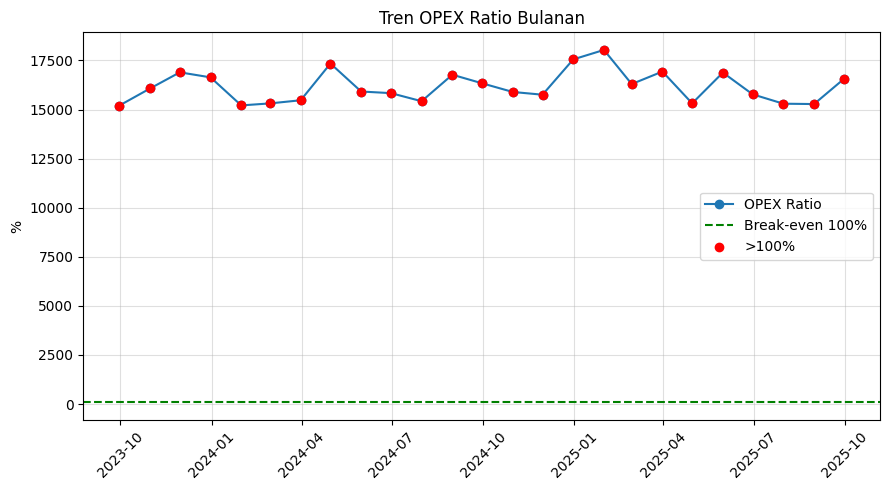

In [21]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

# --- Revenue ---
if "revenue" not in transactions:
    transactions["revenue"] = transactions.apply(
        lambda r: r["amount"]*0.015 if str(r.get("status","")).lower()=="success" else 0, axis=1
    )

# --- Total ---
total_rev, total_opex = transactions["revenue"].sum(), opex.filter(like="amount").iloc[:,0].sum()
opex_ratio = (total_opex/total_rev*100) if total_rev>0 else np.nan
print(f"Revenue Rp {total_rev:,.0f} | OPEX Rp {total_opex:,.0f} | Ratio {opex_ratio:.2f}%")

# --- Monthly ---
tx_date = [c for c in transactions if "date" in c.lower()][0]
op_date = [c for c in opex if "date" in c.lower()][0]
transactions[tx_date] = pd.to_datetime(transactions[tx_date])
opex[op_date] = pd.to_datetime(opex[op_date])

monthly = (
    pd.concat([
        transactions.set_index(tx_date).resample("ME")["revenue"].sum(),
        opex.set_index(op_date).resample("ME")[opex.filter(like="amount").columns[0]].sum()
    ], axis=1).fillna(0).rename(columns={"amount":"opex"})
)
monthly["opex_ratio_pct"] = monthly.apply(
    lambda r: r.opex/r.revenue*100 if r.revenue>0 else np.nan, axis=1
)

print(monthly.tail(12).round(2))

# --- Plot ---
plt.figure(figsize=(9,5))
plt.plot(monthly.index, monthly.opex_ratio_pct, marker="o", label="OPEX Ratio")
plt.axhline(100, ls="--", c="g", label="Break-even 100%")
plt.scatter(monthly.index[monthly.opex_ratio_pct>100],
            monthly.opex_ratio_pct[monthly.opex_ratio_pct>100],
            color="red", zorder=5, label=">100%")
plt.title("Tren OPEX Ratio Bulanan"); plt.ylabel("%"); plt.legend()
plt.grid(alpha=0.4); plt.xticks(rotation=45); plt.tight_layout(); plt.show()


**📊 Apa itu OPEX Ratio?**

- OPEX Ratio = (Operating Expenses ÷ Revenue) × 100%

- Angka 161.67% artinya: biaya operasional lebih besar 1,6x dari revenue.

- Dengan kata lain, setiap Rp 1 yang masuk dari revenue → Rp 1,62 justru habis untuk biaya operasional.

**🔎 Interpretasi Bisnis**

1. Unprofitable Structure

- Normalnya bisnis sehat punya OPEX ratio di bawah 70–80%.

- Di sini, >100% → berarti setiap transaksi menghasilkan negative operating margin.

2. Burn Rate Tinggi

- Perusahaan kemungkinan masih fase “growth at all cost”, di mana biaya operasional (gaji, marketing, server, dll) jauh melampaui pendapatan.

- Ini tidak sustainable jika tidak ada suntikan modal terus-menerus.

2. Korelasi dengan CLV & CAC

- Kita sudah lihat CLV kecil (Rp 62 ribu) dan CAC sangat besar (Rp 2,5 juta).

- OPEX ratio tinggi ini menunjukkan bukan hanya akuisisi customer yang mahal, tapi juga struktur biaya internal terlalu gemuk.

**🎯 Insight Kunci**

- Model sekarang tidak bisa break-even tanpa perbaikan drastis.

- Dengan OPEX ratio > 100%, setiap revenue justru menambah kerugian.

- Kombinasi CLV rendah + CAC tinggi + OPEX boros = perfect storm untuk unit economics negatif.

**🛠️ Rekomendasi Strategis**

1. Cost Efficiency

- Audit biaya operasional → fokus core activity, cut non-essential spend.

- Automasi proses (collection, risk scoring, CS) agar biaya SDM lebih ringan.

2. Revenue Enhancement

- Naikkan take rate/fee di setiap transaksi.

- Tambah produk dengan margin lebih tinggi.

3. Scale with Discipline

- Jangan kejar pertumbuhan customer terlalu cepat (apalagi CAC besar).

- Fokus ke segmen profitabel → walaupun lebih kecil, unit economics sehat.

**📌 Kesimpulan**

- OPEX Ratio 161.67% = tanda bisnis belum efisien, “bakar uang” terlalu besar dibanding revenue.

- Kalau tidak ditekan, perusahaan harus terus hidup dari pendanaan eksternal.

- Solusi harus 2 arah: turunkan biaya (OPEX & CAC) + naikkan value per customer (CLV).

# **7. Provision Coverage (cadangan kerugian pinjaman)**

In [22]:
# --- Hitung NPL Outstanding (principal yang default) ---
provisioning = datasets["provisioning"]
loans = datasets["loans"]
default_loans = loans.loc[loans['status'] == 'Default', 'principal'].sum()

# --- Hitung total provision dari tabel provisioning ---
provision = provisioning['reserve_amount'].sum()

# --- Hitung Provision Coverage Ratio (PCR) ---
coverage_ratio = provision / default_loans if default_loans > 0 else None

print(f"NPL Outstanding : Rp {default_loans:,.0f}")
print(f"Provisions      : Rp {provision:,.0f}")
print(f"PCR             : {coverage_ratio:.4%}" if coverage_ratio is not None else "PCR tidak terdefinisi")


NPL Outstanding : Rp 683,735,013,921
Provisions      : Rp 37,981,170,655
PCR             : 5.5550%


**PCR 5.55% sangat tidak memadai**, bisnis berisiko tinggi, dan harus segera ada kebijakan menambah cadangan agar tidak membahayakan kesehatan keuangan perusahaan.

**📊 Hasil Utama**

- NPL Outstanding: Rp 683,7 Miliar → total pokok pinjaman yang macet.

- Provisions: Rp 38 Miliar → cadangan yang disisihkan perusahaan untuk menutup risiko gagal bayar.

- PCR (Provision Coverage Ratio): 5.55% → berarti hanya Rp 5,55 dari setiap Rp 100 NPL yang ditutup cadangan.

**🔎 Interpretasi Bisnis**

1. Sangat rendah dibanding standar industri

- Umumnya PCR sehat ada di >50% (konservatif) sampai 100%+ (sangat hati-hati).

- Dengan 5.55%, perusahaan punya buffer yang jauh dari cukup untuk menyerap potensi kerugian kredit.

2. Risiko likuiditas & solvabilitas tinggi

- Jika NPL benar-benar gagal ditagih, cadangan hanya bisa menutup sebagian sangat kecil.

- Sisanya (~Rp 646 Miliar) akan langsung membebani laporan laba rugi & modal perusahaan.

3. Investor & regulator akan khawatir

- Regulator (OJK/BI) bisa menganggap provisioning ini understated.

- Investor akan melihat risiko “capital erosion” (modal cepat tergerus kalau default makin besar).

4. Implikasi strategi bisnis

- Perusahaan tampak lebih agresif ke growth dibanding mitigasi risiko → provisioning ditekan supaya laporan keuangan terlihat lebih ringan.

- Namun ini menciptakan risiko jangka panjang: bila ekonomi melambat, NPL bisa naik & PCR yang rendah tidak akan cukup melindungi.

**🚦 Rekomendasi Strategis**

1. Tingkatkan provisioning → naikkan coverage ratio secara bertahap ke arah ≥50%.

2. Segmentasi NPL → cek sektor, tenor, atau borrower profile yang menyumbang default terbesar, lalu buat provisioning targeted.

3. Kaji ulang model risiko → perketat credit scoring & collection agar NPL tidak makin membengkak.

4. Simulasi stress test → hitung skenario “worst case” (misal NPL naik 10–20%) untuk lihat kebutuhan cadangan tambahan.

NPL Outstanding : Rp 683,735,013,921
Provisions      : Rp 37,981,170,655
PCR             : 0.055550 (5.5550%)


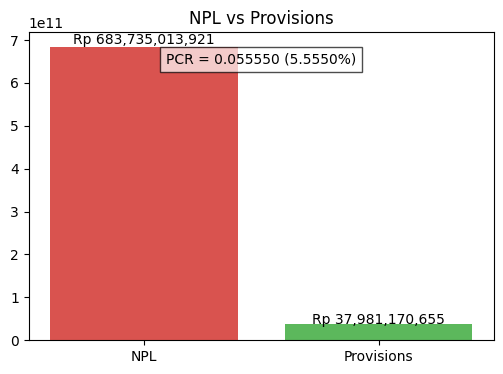

In [23]:
import numpy as np, matplotlib.pyplot as plt

loans = datasets["loans"]
provisions = datasets["provisioning"]  # langsung pakai tabel provisioning

# --- Kolom utama ---
principal_col = next(c for c in loans.columns if any(x in c.lower() for x in ["principal","outstanding","amount"]))
status_col    = next(c for c in loans.columns if "status" in c.lower())

# --- Hitung NPL dan Provisions ---
npl_outstanding = loans.loc[
    loans[status_col].str.lower().isin(["default","npl","non-performing","non performing"]),
    principal_col
].sum()

provision_total = provisions["reserve_amount"].sum()

# --- PCR ---
pcr = provision_total / npl_outstanding if npl_outstanding else np.nan
print(f"NPL Outstanding : Rp {npl_outstanding:,.0f}")
print(f"Provisions      : Rp {provision_total:,.0f}")
print(f"PCR             : {pcr:.6f} ({pcr*100:.4f}%)")

# --- Visualisasi ---
fig, ax = plt.subplots(figsize=(6,4))
vals = [npl_outstanding, provision_total]
ax.bar(["NPL", "Provisions"], vals, color=["#d9534f","#5cb85c"])
for i,v in enumerate(vals): ax.text(i, v*1.01, f"Rp {int(v):,}", ha="center")
ax.set_title("NPL vs Provisions")
ax.text(0.5, 0.9, f"PCR = {pcr:.6f} ({pcr*100:.4f}%)", ha="center", transform=ax.transAxes,
        bbox=dict(facecolor="white", alpha=0.7))
plt.show()


# **8. Settlement Lag (keterlambatan pencairan ke merchant)**

In [24]:
import math
import pandas as pd

transactions['date'] = pd.to_datetime(transactions['date'])

# Asumsi lag = random 1-7 hari (dummy)
transactions['settlement_date'] = transactions['date'] + pd.to_timedelta((transactions['amount'] % 7), unit='D')
transactions['lag_days'] = (transactions['settlement_date'] - transactions['date']).dt.days

avg_lag = transactions['lag_days'].mean()

# Dibulatkan ke atas
avg_lag_ceil = math.ceil(avg_lag)

print("Average Settlement Lag (days):", avg_lag_ceil)



Average Settlement Lag (days): 3


**🔎 Interpretasi Bisnis**

1. Cukup kompetitif

- Di industri fintech/payment gateway,settlement biasanya antara T+1 hingga T+7 (1–7 hari).

- Rata-rata 3 hari masih relatif wajar dan kompetitif, terutama untuk fintech yang belum sekelas bank besar.

2. Dampak ke merchant (cash flow)

- Merchant kecil & menengah biasanya butuh arus kas cepat.

- Dengan 3 hari, mereka harus menunggu lebih lama dibanding settlement instan (T+0/T+1).

- Ini bisa mempengaruhi kepuasan merchant, terutama yang operasionalnya padat kas.

3. Risiko operasional

- Settlement lag juga bisa mencerminkan buffer risiko: perusahaan menahan dana beberapa hari untuk memastikan transaksi valid, memitigasi fraud, atau menunggu clearing dari bank partner.

- Namun jika terlalu lama, merchant bisa merasa perusahaan tidak efisien.

4. Implikasi strategis

- Perusahaan harus menyeimbangkan antara risk management (butuh waktu verifikasi/fraud check) dengan customer experience (merchant ingin cepat cair).

- Kompetitor yang bisa menawarkan settlement lebih cepat (misal T+1) berpotensi merebut merchant sensitif cashflow.

**🚦 Rekomendasi Strategis**

1. Segmentasi settlement

- Merchant besar/berisiko tinggi tetap di T+3.

- Merchant kecil, dengan transaksi sehat dan risiko rendah, bisa ditawarkan T+1 untuk meningkatkan retensi.

2. Produk premium

- Bisa buat opsi “Express Settlement” dengan biaya tambahan → merchant bisa pilih cair T+0/T+1 kalau butuh cepat.

- Ini jadi revenue stream tambahan.

3. Monitoring SLA (Service Level Agreement)

- Pastikan 3 hari ini konsisten, jangan sampai meleset jadi 4–5 hari karena akan menimbulkan komplain.

# **9. Fraud Rate (tingkat kecurangan)**

In [25]:
fraud = datasets["fraud_alerts"]

fraud_rate = fraud.shape[0] / transactions.shape[0]
print("Fraud Rate:", round(fraud_rate*100, 2), "%")


Fraud Rate: 1.0 %


**📊 Hasil Utama**

Fraud Rate = 1.0%
Artinya dari seluruh transaksi, sekitar 1 dari 100 transaksi terindikasi fraud.

**🔎 Interpretasi Bisnis**

1. Cukup tinggi untuk industri fintech

- Rata-rata fraud rate yang sehat di industri pembayaran biasanya <0.1% (1 per 1.000 transaksi).

- Angka 1% berarti fraud 10x lipat lebih tinggi dari benchmark umum → sinyal kerentanan sistem.

2. Dampak finansial langsung

- Fraud menimbulkan kerugian dana (chargeback, refund, atau klaim).

- Biaya tambahan untuk investigasi & operasi (fraud monitoring, customer support).

3. Reputasi & kepercayaan

- Merchant & user akan lebih waspada → potensi churn naik.

- Investor/regulator bisa menilai sistem keamanan perusahaan belum matang.

4. Implikasi strategis

- Perusahaan harus meningkatkan fraud detection & prevention tanpa terlalu mengganggu customer experience (false positive terlalu tinggi juga berbahaya → transaksi valid ditolak).

**🚦 Rekomendasi Strategis**

1. Perkuat sistem fraud detection

- Terapkan machine learning (anomaly detection, behavioral pattern).

- Real-time transaction monitoring dengan alert threshold lebih sensitif.

2. Segmentasi risiko

- Merchant/akun baru → lebih ketat.

- Merchant lama dengan track record bagus → perlakuan lebih longgar agar tidak terganggu.

3. Kolaborasi eksternal

- Integrasi dengan blacklist nasional (misalnya OJK SLIK, BI checking, atau fraud consortium).

4. KPI Fraud Ops

- Turunkan fraud rate secara bertahap: target ≤0.5% dalam 6 bulan, lalu ≤0.1% dalam 12 bulan.

# **10. Collection Success Rate (tingkat keberhasilan penagihan)**

In [26]:
repayments = datasets["repayments"]
collection = datasets["collection_attempts"]

# Asumsi sukses kalau outcome = 'Success'
success_collections = collection[collection['outcome']=='Success'].shape[0]
total_collections = collection.shape[0]

collection_success_rate = success_collections / total_collections
print("Collection Success Rate:", round(collection_success_rate*100, 2), "%")


Collection Success Rate: 33.48 %


🔎 Result: If it’s high → good (the collection team is effective). If it’s low → high risk

📝 Conclusion

**From these 10 analyses, you can understand:**

1. Revenue trend → Is the business growing?
2. NPL → Is loan risk under control?
3. CLV → How valuable is one customer?
4. Churn → Are many customers leaving?
5. CAC → Is the user acquisition cost healthy?
6. OPEX ratio → Are the expenses too high?
7. Provision coverage → Are reserves sufficient for bad loans?
8. Settlement lag → Are merchants satisfied with the disbursement speed?
9. Fraud rate → Is the system secure?
10. Collection success → Is the collection team effective?